In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [12]:
deliveries = pd.read_csv('Ipl Data/deliveries.csv')
matches=pd.read_csv("Ipl Data/matches.csv")

In [13]:
#Data Cleaning
#Replacing duplicate team name
matches=matches.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
matches=matches.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
matches=matches.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 
deliveries=deliveries.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
deliveries=deliveries.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
deliveries=deliveries.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 
deliveries=deliveries.replace(to_replace='RG Sharma', value='R Sharma')

#Filling Null values in winner column
matches['winner'] = matches['winner'].fillna("No Result")

#Merging similar name of stadiums into one
matches=matches.replace(to_replace ="MA Chidambaram Stadium, Chepauk", value ="M. A. Chidambaram Stadium") 
matches=matches.replace(to_replace ="Punjab Cricket Association IS Bindra Stadium, Mohali", value ="Punjab Cricket Association Stadium, Mohali") 
matches=matches.replace(to_replace ="M. Chinnaswamy Stadium", value ="M Chinnaswamy Stadium") 
matches=matches.replace(to_replace ="ACA-VDCA Stadium", value ="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium") 
matches=matches.replace(to_replace ="Rajiv Gandhi International Stadium, Uppal", value ="Rajiv Gandhi Intl. Cricket Stadium") 

In [14]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


Sunrisers Hyderabad
[209, 214, 184, 190, 198, 196, 178, 205, 201, 208, 209, 233]


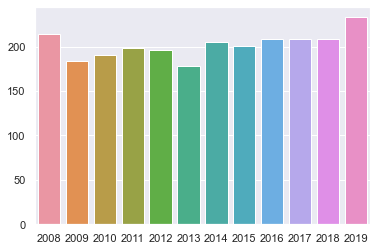

Royal Challengers Bangalore
[213, 181, 176, 204, 205, 215, 263, 190, 235, 248, 222, 219]


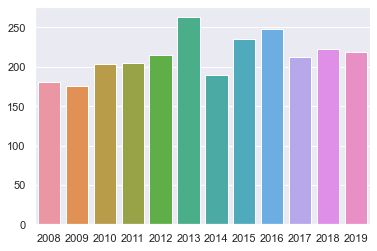

Mumbai Indians
[223, 202, 187, 218, 182, 197, 209, 195, 209, 206, 230, 210]


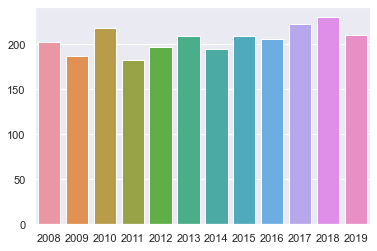

Rising Pune Supergiants
[187, nan, nan, nan, nan, nan, nan, nan, nan, 195, nan, nan]


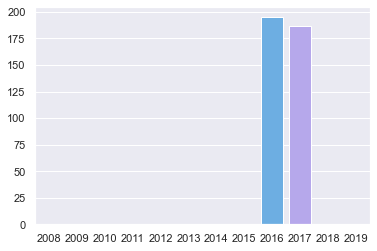

Gujarat Lions
[208, nan, nan, nan, nan, nan, nan, nan, nan, 196, nan, nan]


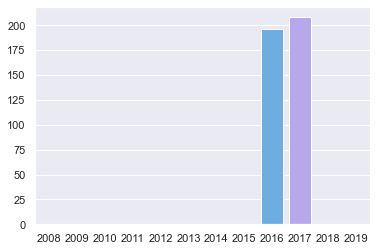

Kolkata Knight Riders
[187, 222, 189, 200, 175, 192, 186, 200, 190, 189, 250, 241]


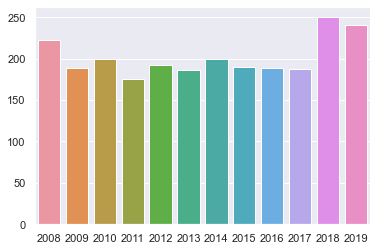

Kings XI Punjab
[230, 221, 174, 204, 232, 194, 194, 231, 191, 181, 221, 204]


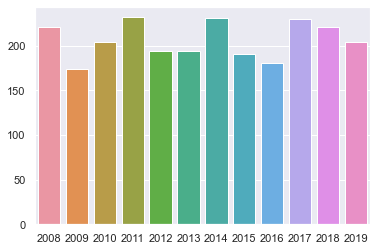

Delhi Capitals
[214, 194, 189, 188, 231, 207, 179, 180, 190, 192, 223, 219]


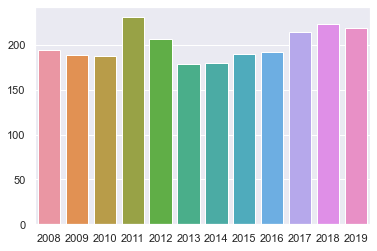

Chennai Super Kings
[nan, 240, 188, 246, 205, 222, 223, 205, 209, nan, 218, 186]


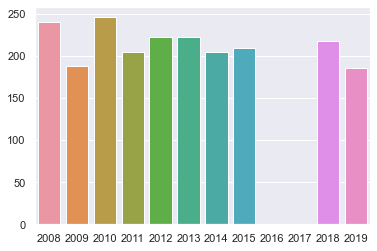

Rajasthan Royals
[nan, 217, 211, 223, 159, 197, 185, 201, 199, nan, 231, 203]


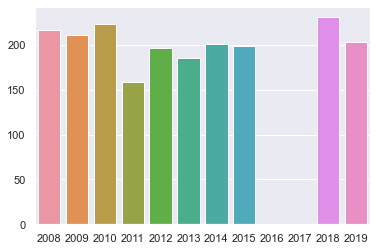

Kochi Tuskers Kerala
[nan, nan, nan, nan, 184, nan, nan, nan, nan, nan, nan, nan]


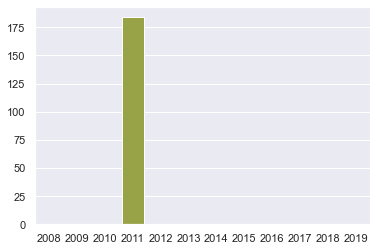

Pune Warriors
[nan, nan, nan, nan, 187, 192, 185, nan, nan, nan, nan, nan]


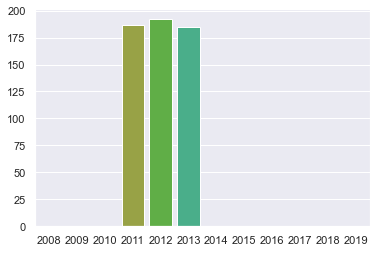

In [15]:
# Highest Run scored by each team in an inning in each season

match = []
inning = []
bat_team = []
bowl_team = []
runs = []
for mat in deliveries['match_id'].unique():
    for inn in deliveries[ deliveries['match_id']==mat ]['inning'].unique():
        df_tmp = deliveries[
                        (deliveries['match_id']==mat) &
                        (deliveries['inning']==inn)
        ]
        total_runs = df_tmp['total_runs'].sum()
        runs.append(total_runs)
        match.append(mat)
        inning.append(inn)
        bat_team.append(df_tmp['batting_team'].unique()[0])
        bowl_team.append(df_tmp['bowling_team'].unique()[0])
        
df_runs = pd.DataFrame()
df_runs['match_id'] = match
df_runs['inning'] = inning
df_runs['bat_team'] = bat_team
df_runs['bowl_team'] = bowl_team
df_runs['total_runs'] = runs
df_runs['season'] = [matches[ matches['id']==i ]['season'].unique()[0] for i in match] 

for team in df_runs['bat_team'].unique():
    max_runs = []
    for year in df_runs['season'].unique():
        max_run = df_runs[
                    (df_runs['bat_team']==team) &
                    (df_runs['season']==year)
        ]['total_runs'].max()
        max_runs.append(max_run)
    print(team)
    print(max_runs)
    sns.barplot(df_runs['season'].unique(), max_runs)
    plt.show()


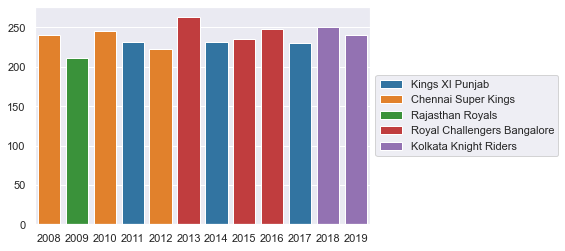

In [16]:
# Which Team Scored Hightest Total in each season

season = []
team_id = []
max_runs = []
for year in df_runs['season'].unique():
    max_run = df_runs[ df_runs['season']==year ]['total_runs'].max()
    team = df_runs[ (df_runs['season']==year) & (df_runs['total_runs']==max_run) ]['bat_team'].unique()[0]
    season.append(year)
    team_id.append(team)
    max_runs.append(max_run)

ax = sns.barplot(x = season, y = max_runs, hue = team_id, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
plt.show()

Batsman's name = DA Warner
Number of Innings Played by DA Warner = 126
DA Warner's Average = 44.13084112149533
DA Warner's Strike rate = 124.66752738981302

Batsman's name = V Kohli
Number of Innings Played by V Kohli = 169
V Kohli's Average = 38.17605633802817
V Kohli's Strike rate = 118.77360039163217

Batsman's name = R Sharma
Number of Innings Played by R Sharma = 194
R Sharma's Average = 30.857142857142858
R Sharma's Strike rate = 107.60903844751408

Batsman's name = AD Russell
Number of Innings Played by AD Russell = 52
AD Russell's Average = 35.375
AD Russell's Strike rate = 159.662336523159

Batsman's name = HH Pandya
Number of Innings Played by HH Pandya = 61
HH Pandya's Average = 29.35135135135135
HH Pandya's Strike rate = 148.34440699460256

Batsman's name = RR Pant
Number of Innings Played by RR Pant = 54
RR Pant's Average = 37.59574468085106
RR Pant's Strike rate = 137.12944646508535



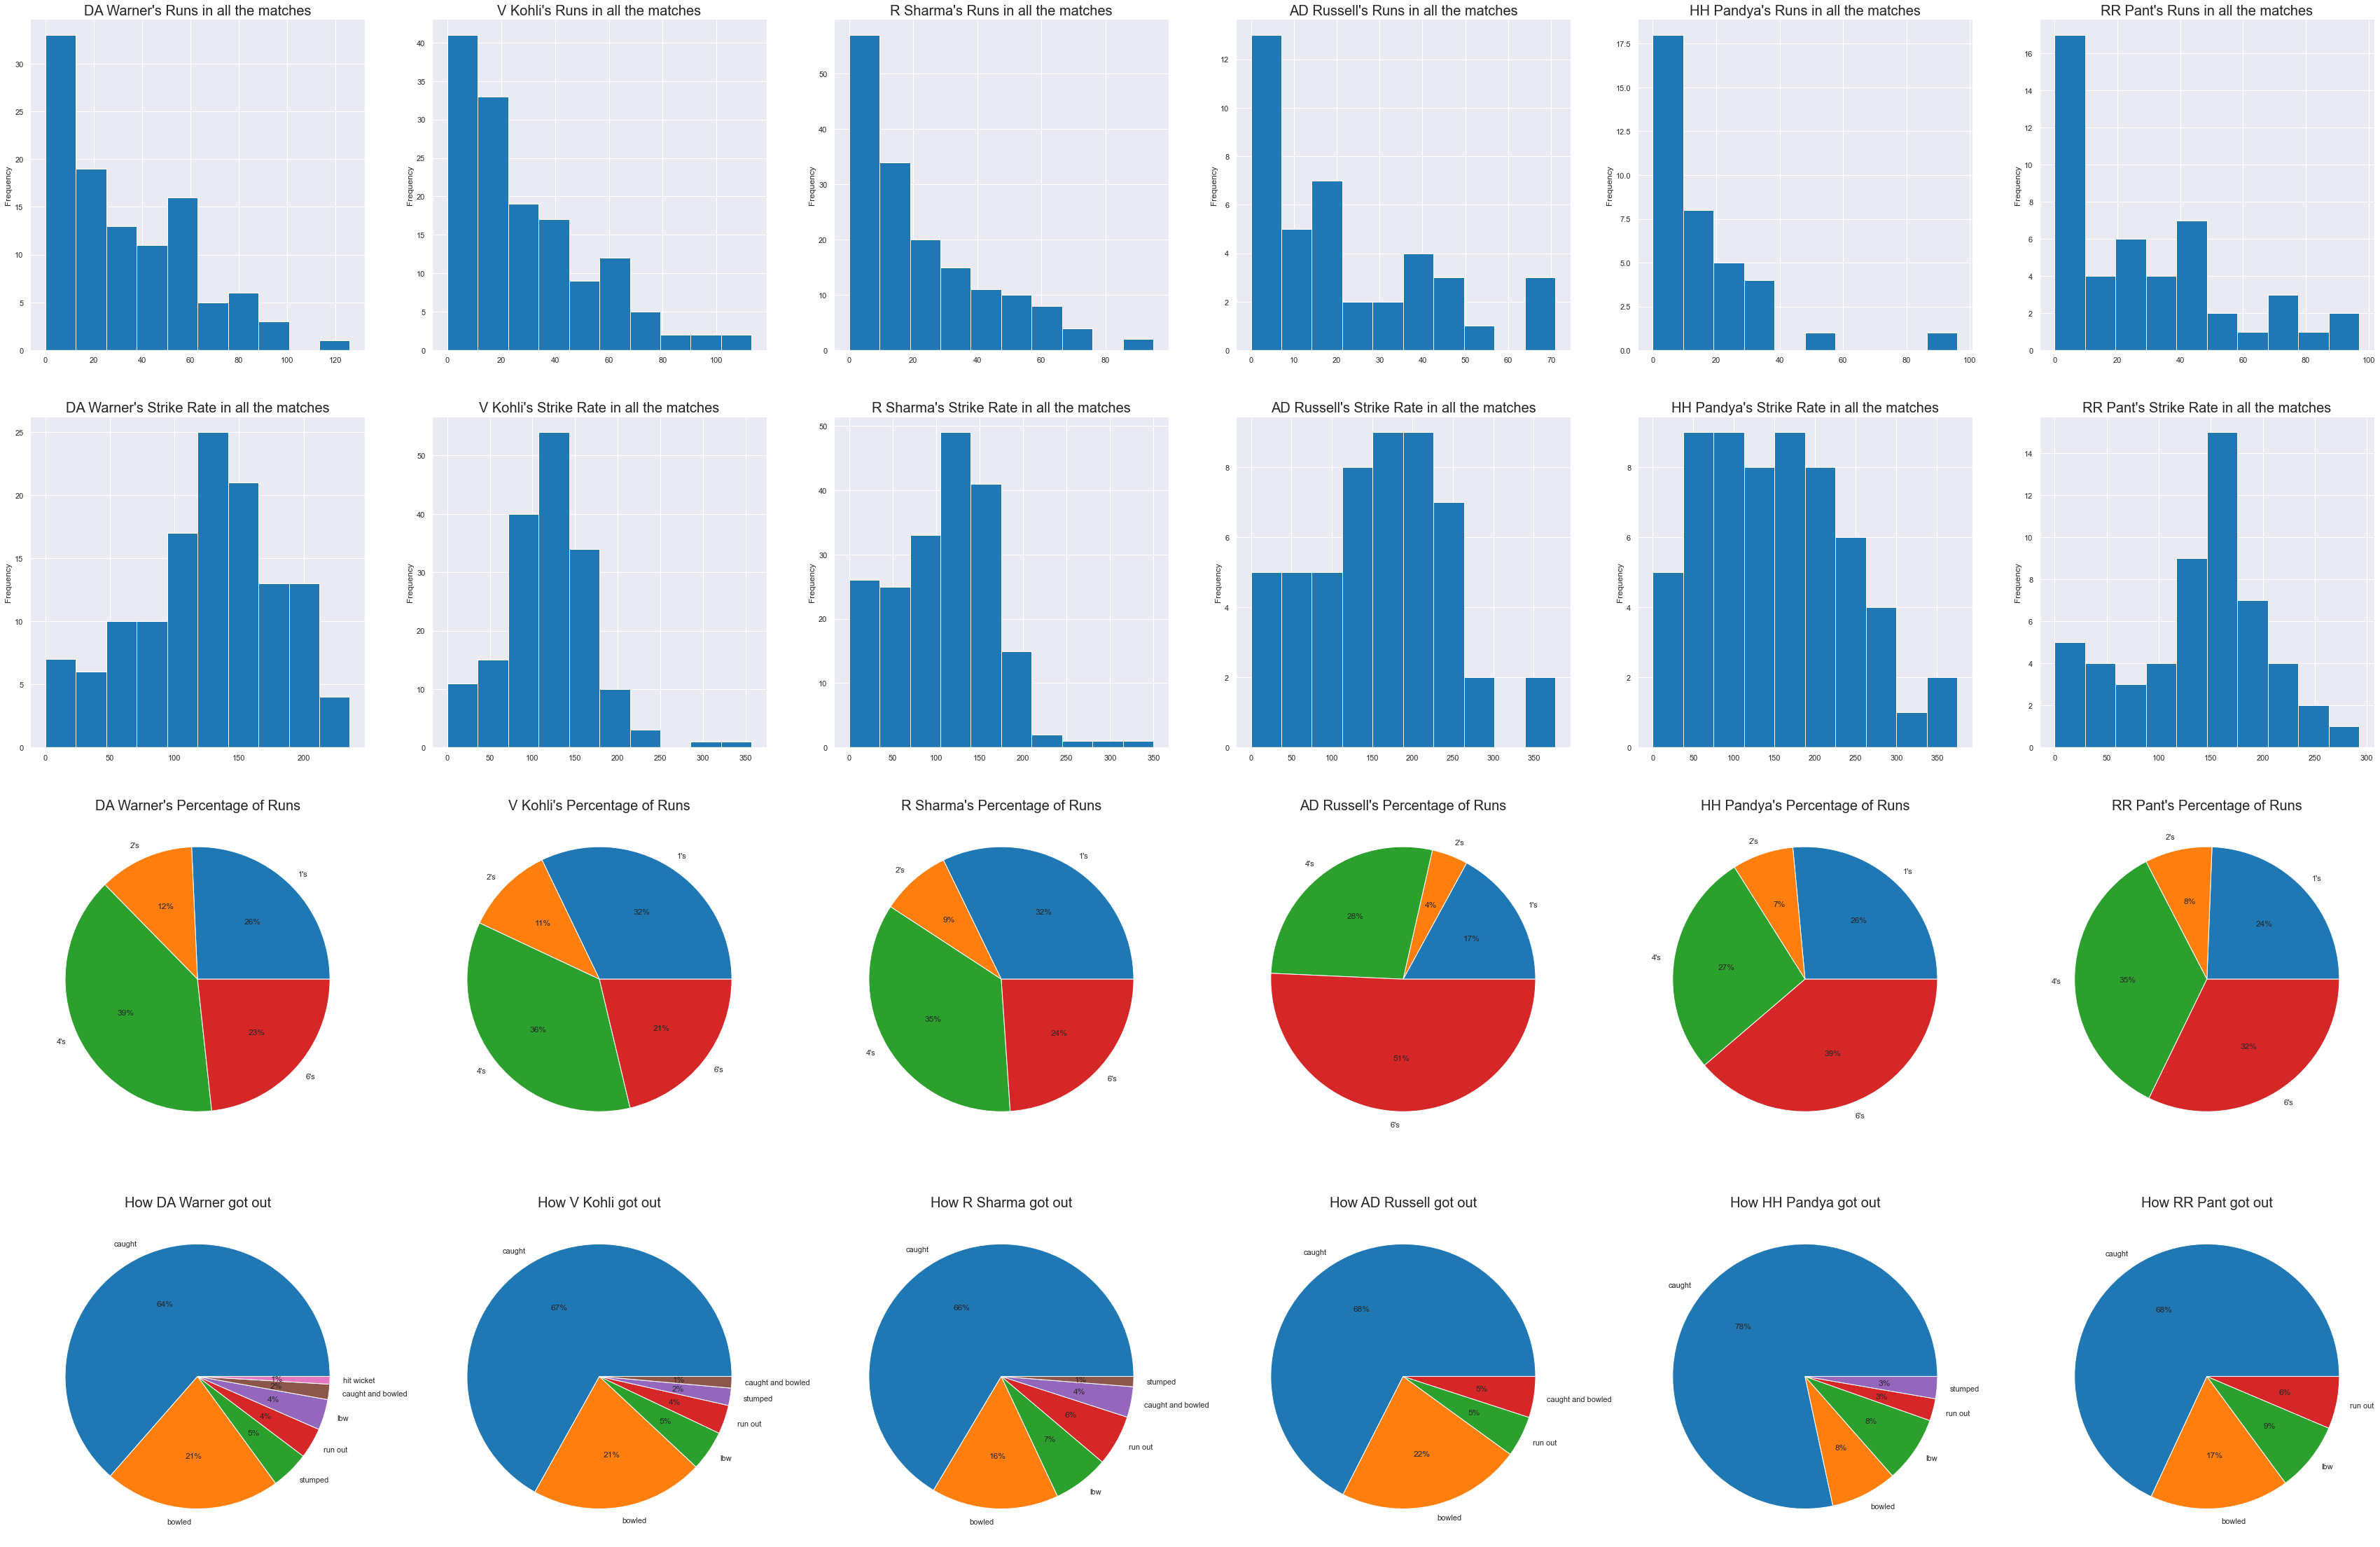

In [17]:
def Batsmen(bat_name, fig, axes, pos):
    data = []
    for match in deliveries['match_id'].unique():
        df_tmp = deliveries[
                (deliveries['batsman']==bat_name) &
                (deliveries['match_id']==match) &
                (deliveries['is_super_over']==0) &
                (deliveries['wide_runs']==0)
        ]
        if df_tmp.shape[0]==0: continue

        out = 0
        if bat_name in df_tmp['player_dismissed'].unique(): out=1
        how_out = None
        if out: how_out = df_tmp[ df_tmp['player_dismissed']==bat_name ]['dismissal_kind'].unique()[0]

        row = []
        row.append(match)
        row.append(df_tmp['batsman_runs'].sum())
        row.append(df_tmp.shape[0])
        #print(row)
        dic = dict(df_tmp['batsman_runs'].value_counts())
        runs = 0
        for i in range(7):
            if i in dic.keys(): 
                row.append(dic[i])
                runs += i*dic[i]
            else: row.append(0)
        row.append(out)
        row.append(how_out)

        data.append(row)
        #assert(row[2]==sum(row[3:10]))
        #assert(row[1]==runs)

    #print(data)
    df_bat = pd.DataFrame(data, columns=['match_id', 'total_runs', 'total_balls', '0', '1', '2', '3', '4', '5', '6', 'out', 'how_out'])
    df_bat.head(10)
    print("Number of Innings Played by "+bat_name+" = "+str(df_bat.shape[0]))
    if df_bat['out'].sum()!=0: print(bat_name+'\'s Average = '+str(df_bat['total_runs'].sum()/df_bat['out'].sum()))
    
    sns.set()
    sns.set_palette(sns.color_palette('tab10'))
    df_bat[ df_bat['out']==1 ]['total_runs'].plot(kind='hist', ax = axes[0, pos])
    axes[0,pos].set_title(bat_name+'\'s Runs in all the matches', fontsize=20)
    #plt.show()
    
    st = df_bat['total_runs']/df_bat['total_balls']*100
    print(bat_name+'\'s Strike rate = '+str(np.average(st)))
    st.plot(kind='hist', ax = axes[1, pos])
    axes[1,pos].set_title(bat_name+'\'s Strike Rate in all the matches', fontsize=20)
    #plt.show()
    
    runs = []
    for i in [1,2,4,6]:
        runs.append(i*df_bat[str(i)].sum())
    axes[2,pos].pie(runs, labels = ['1\'s','2\'s','4\'s','6\'s'], autopct = "%1.0f%%")
    axes[2,pos].set_title(bat_name+'\'s Percentage of Runs', fontsize=20)
    #plt.show()
    
    axes[3,pos].pie(df_bat['how_out'].value_counts().values, labels = df_bat['how_out'].value_counts().index, autopct = '%1.0f%%')
    axes[3,pos].set_title('How '+bat_name+' got out', fontsize=20)
    #plt.show()
    
name = ['DA Warner', 'V Kohli', 'R Sharma', 'AD Russell', 'HH Pandya', 'RR Pant']
pos = 0
fig, axes = plt.subplots(4,len(name), figsize = (60,40))
for i in name:
    print('Batsman\'s name = '+i)
    Batsmen(i, fig, axes, pos)
    pos +=1
    print()
plt.show()
#fig.savefig('Batsmen.png')